# Introduction

In this analysis, we aim to answer the question: **Does BMI influence the choice of workout type?** Understanding the relationship between Body Mass Index (BMI) and workout preference can provide insights into how individuals tailor their exercise routines based on their body composition, which could have implications for personalized fitness programs.

To investigate this question, we will analyze the distribution of BMI across different workout types. We will begin with visualizations to compare BMI distributions by workout category, allowing us to identify any apparent trends or differences. Following this, we will conduct a hypothesis test to statistically assess whether there is a significant difference in BMI between these groups.

The approach includes:
- **Distribution Visualization**: Using box plots and density plots to visually compare BMI across workout types.
- **Hypothesis Testing**: Performing statistical tests to determine if observed differences in BMI are significant.
- **Effect Size Analysis**: If any observed differences in BMI are significant we are going to calculate the effect size to evaluate the practical significance of any differences.

This analysis will ultimately provide a data-driven conclusion about the influence of BMI on workout type preference, helping to clarify any patterns that exist within the gym member population.

# Install Requirements.txt

In [1]:
!pip install -r ../requirements.txt

# Import

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from plotnine import *
from scipy import stats

# Data Extraction

In [3]:
# Load the dataset
path = "../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

In [4]:
# Display the first few rows to understand the dataset structure
display(df_gym.head())

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


### 1. Data frame info

In [5]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### 2. Transform

In [6]:
# Convert categorical columns to dummy variables
# This will allow us to include `Gender`, `Workout_Type`, and any other categorical columns in the correlation analysis.
df_encoded = pd.get_dummies(df_gym, columns=["Gender", "Workout_Type"], drop_first=True)

In [7]:
# Display the first few rows of the transformed dataset to confirm the encoding
display(df_encoded.head())

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,True,False,False,True
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,False,True,False,False
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,False,False,False,False
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,True,False,True,False
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,True,False,True,False


In [8]:
df_bmi = df_gym[['Workout_Type', 'BMI']].copy()

# Data Exploratory

### Distribution Visualization

C:\Users\raiss\AppData\Local\Temp\ipykernel_41692\2462529007.py:8: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


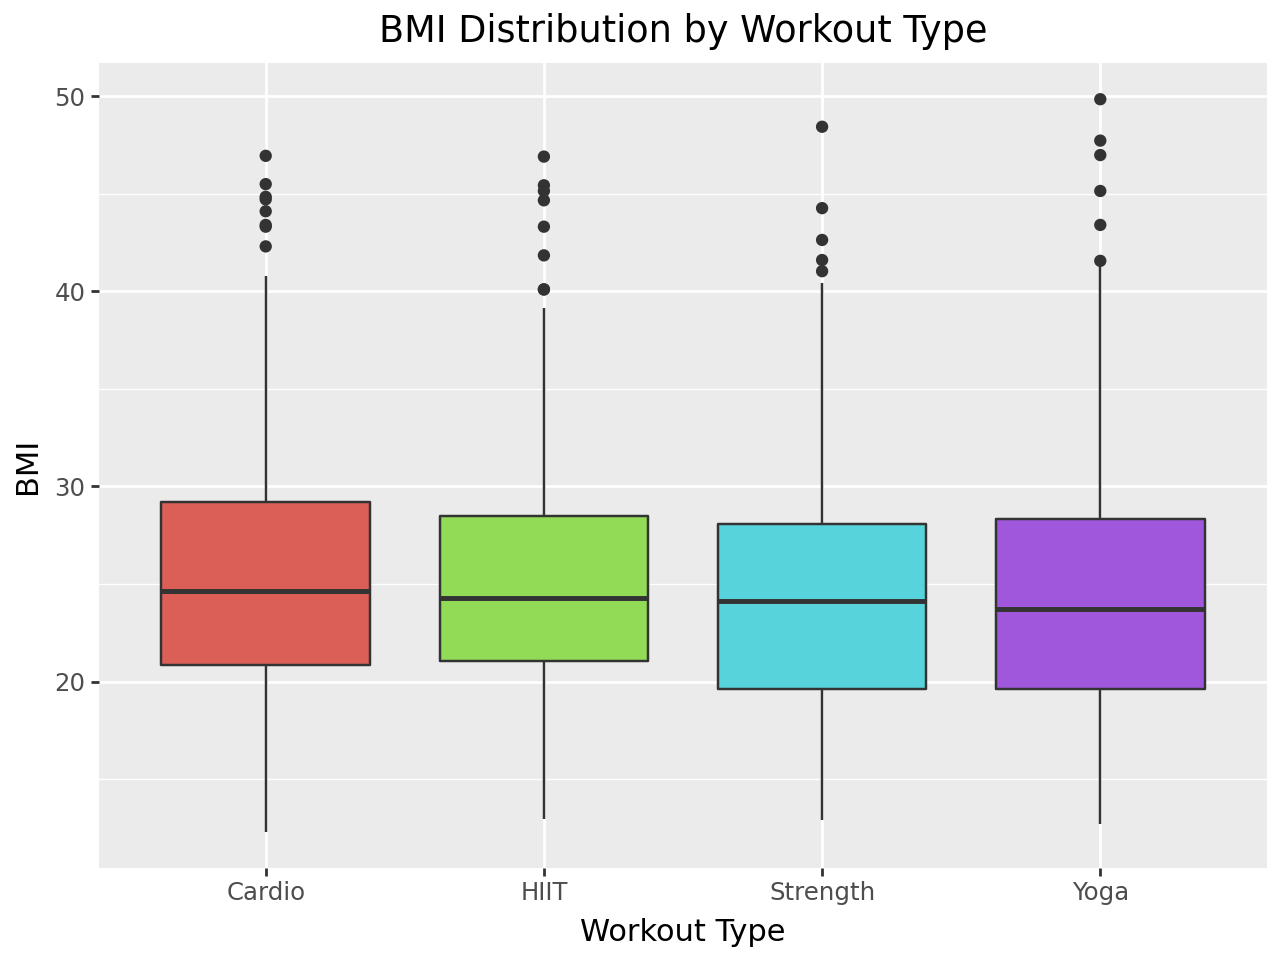

In [9]:
# Box plot for BMI by Workout_Type
plot_bmi_workout_type = (
    ggplot(df_gym, aes(x="Workout_Type", y="BMI", fill="Workout_Type"))
    + geom_boxplot()
    + labs(title="BMI Distribution by Workout Type", x="Workout Type", y="BMI")
    + theme(legend_position="none")
)
print(plot_bmi_workout_type)

C:\Users\raiss\AppData\Local\Temp\ipykernel_41692\892142695.py:7: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


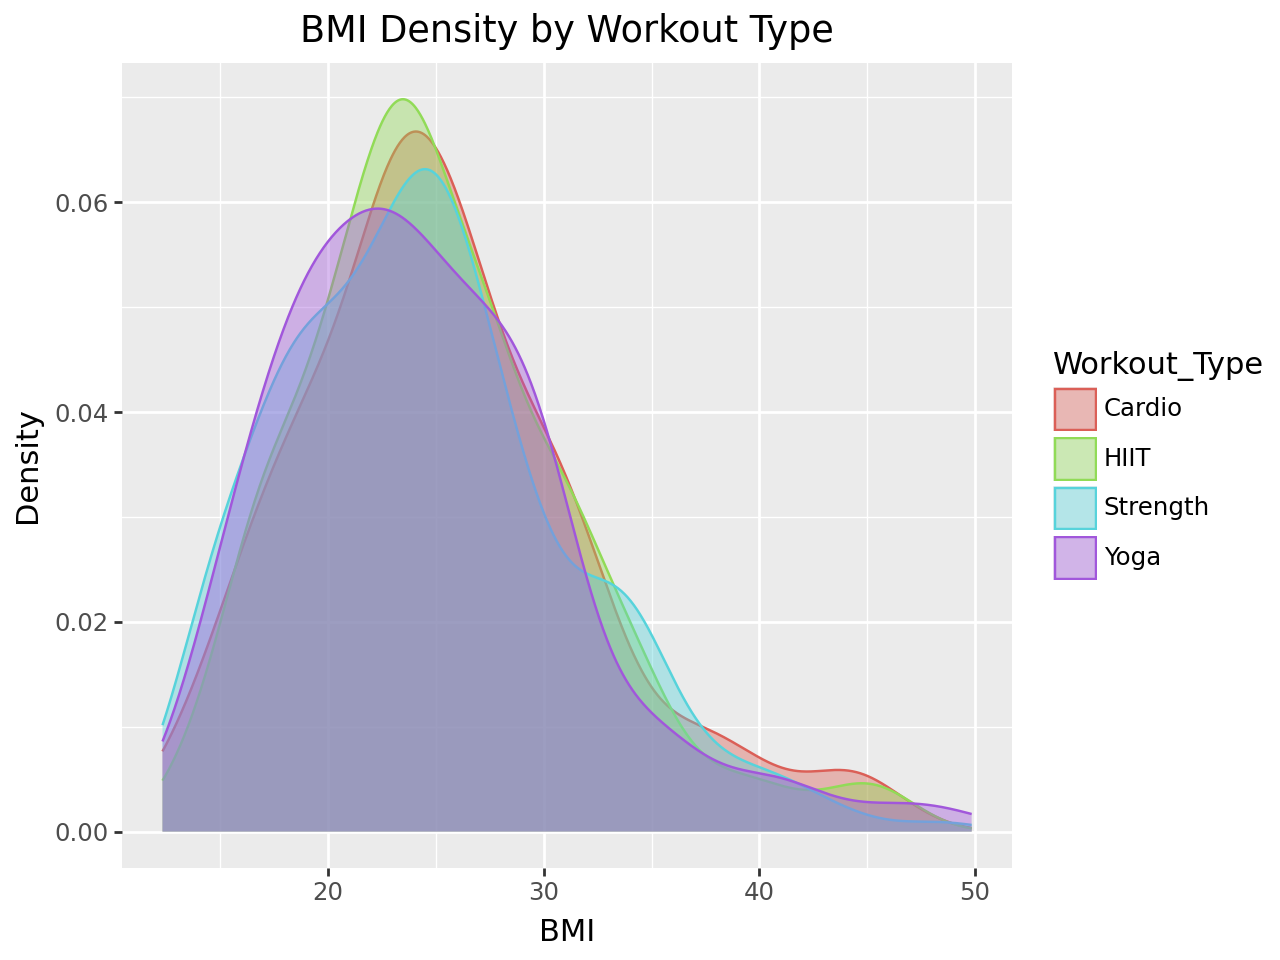

In [ ]:
# Density plot for BMI by Workout_Type
plot_bmi_density = (
    ggplot(df_gym, aes(x="BMI", color="Workout_Type", fill="Workout_Type"))
    + geom_density(alpha=0.4)
    + labs(title="BMI Density by Workout Type", x="BMI", y="Density")
)
print(plot_bmi_density)

The box plot and density plot provide insights into the distribution of BMI across different workout types. A few key observations can be drawn:

1. **Broad BMI Range Across Workout Types**: Each workout type has participants with a wide range of BMIs, indicating that individuals with varied body compositions engage in all types of exercises. This diversity challenges the assumption that certain workout types attract people within a specific BMI range.

2. **Similar Median BMIs**: The median BMI appears consistent across all workout types, suggesting that, on average, BMI might not be a significant factor in determining workout preference. This observation raises an interesting question about whether workout choice is more influenced by other factors (such as fitness goals, preferences, or experience level) rather than BMI.

3. **Variability (IQR) Differences**: While the medians are similar, the interquartile range (IQR) varies between workout types:
   - **HIIT and Cardio** show narrower IQRs, indicating that these workouts tend to attract individuals within a more specific BMI range. This could imply that HIIT and Cardio may be preferred by individuals with more similar body compositions or fitness goals.
   - **Strength and Yoga** exhibit wider IQRs, which could mean they attract a more diverse BMI range. This diversity might reflect the adaptability of these workout types, where both low and high BMI individuals can participate comfortably.

4. **Outliers**: Each workout type shows a few outliers, particularly at higher BMI values, suggesting that while there is diversity, individuals with very high BMIs may be less frequent in each group. However, the presence of these outliers across all workout types highlights that high BMI does not exclude individuals from choosing any specific type of exercise.

These observations provide a foundation for further investigation. The next step would be to conduct statistical tests to determine whether these apparent differences in BMI distributions across workout types are statistically significant. This approach will help to clarify whether BMI has a meaningful impact on workout type choice or if these similarities are due to random variation in the sample.

### Hypothesis Testing

For our hypothesis test we must first define our hypothesis:

#### 1. Hypothesis

- **Null Hypothesis (H0)**: There is no significant difference in BMI between the workout types (Cardio, HIIT, Strength, Yoga).
- **Alternative Hypothesis (H1)**: There is a significant difference in BMI between at least one pair of workout types.

To test our hypothesis we are going to, use the ANOVA test:

#### 2. Explanation of ANOVA

**Analysis of Variance (ANOVA)** is a statistical method used to compare the means of three or more independent groups to determine if there are any statistically significant differences between them. In other words, ANOVA helps us assess whether the variation in a particular characteristic (in this case, BMI) across multiple groups (workout types) is likely due to random chance or represents a true difference between groups. ANOVA was introduced by Sir Ronald A. Fisher in 1950 (FISHER, Ronald Aylmer. Statistical methods for research workers. 1950). 

**Why ANOVA?**
ANOVA is ideal in this situation because:
1. We have more than two groups (four workout types), and ANOVA allows us to compare multiple groups in a single test.
2. Unlike multiple t-tests, which would increase the risk of Type I error (false positives), ANOVA maintains a single overall error rate, making it a more reliable test for group comparisons.


#### 3. Assumptions for ANOVA

Before performing the ANOVA test, it is essential to verify that the data meets the required assumptions. The primary assumptions for ANOVA include:

- **Independence**: Each observation should be independent of others. This assumption is generally met if the data points are collected independently.
- **Normality**: The BMI data within each workout type should be approximately normally distributed. We will assess this visually using histograms and quantile-quantile (Q-Q) plots.
- **Homogeneity of variances**: The variances of BMI across workout types should be approximately equal. To evaluate this, we will use Levene’s test for homogeneity of variances.

Let’s proceed with the tests for normality and homogeneity of variances.

#### Testing for Normality

C:\Users\raiss\AppData\Local\Temp\ipykernel_41692\2000544809.py:48: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


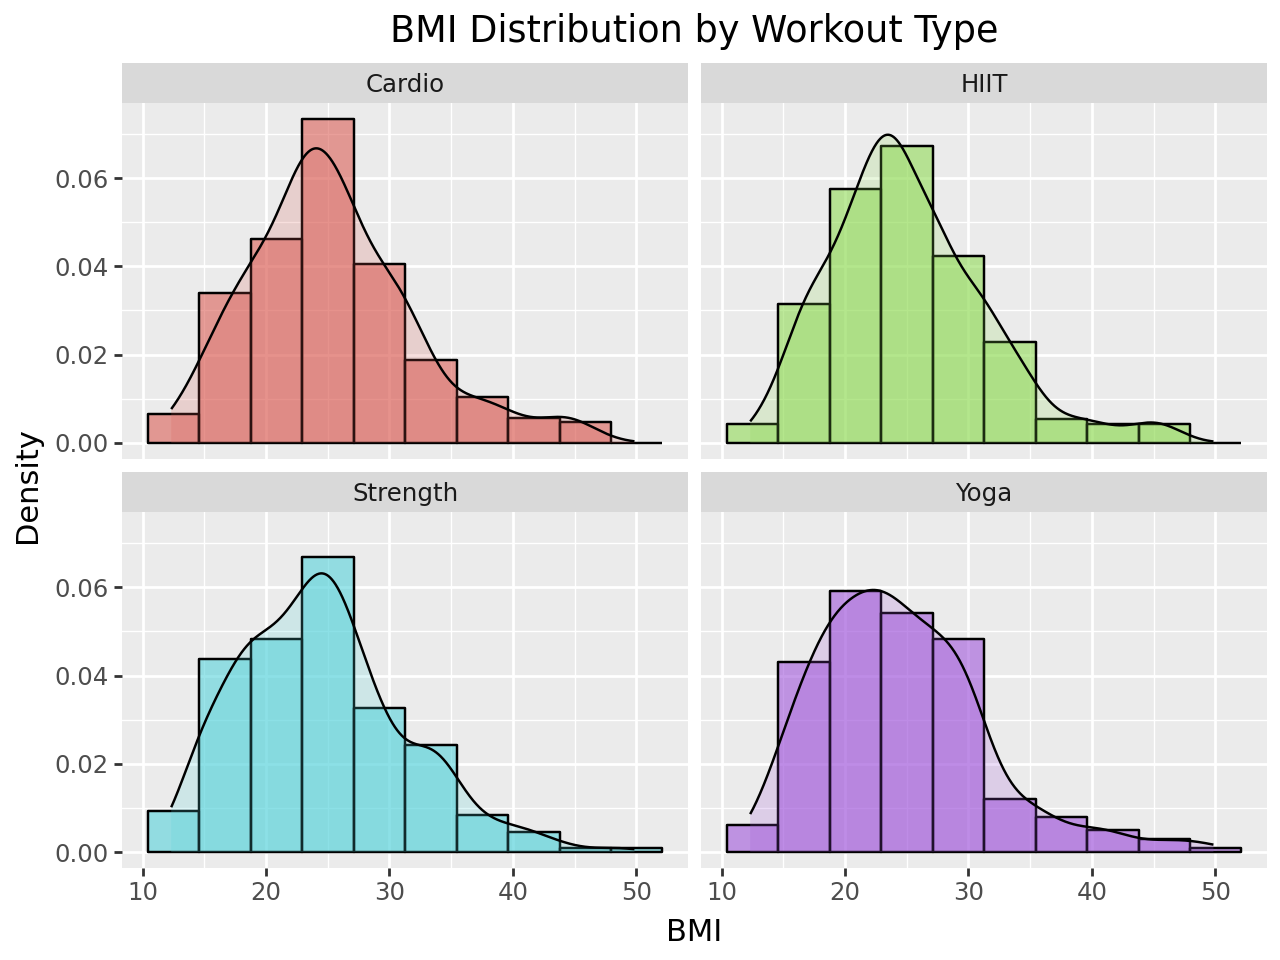

C:\Users\raiss\AppData\Local\Temp\ipykernel_41692\2000544809.py:49: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


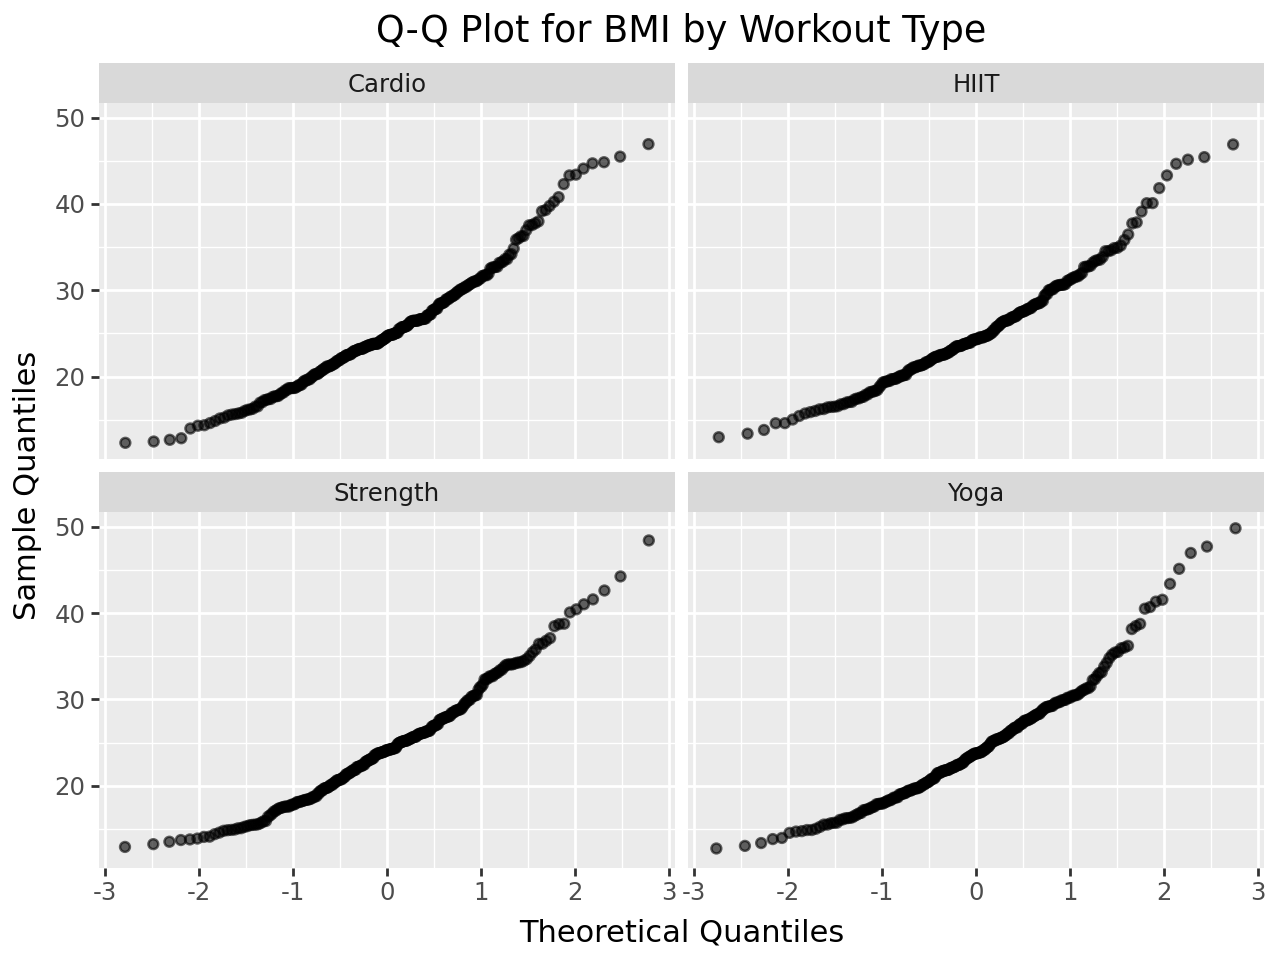

In [11]:
# Load the dataset
path = "../data/gym_members_exercise_tracking.csv"
df_gym = pd.read_csv(path)

# Filter relevant columns for analysis
df_bmi = df_gym[["BMI", "Workout_Type"]]

# Histogram with KDE for BMI by Workout Type using facets
plot_histogram_kde = (
    ggplot(df_bmi, aes(x="BMI", fill="Workout_Type"))
    + geom_histogram(aes(y="..density.."), bins=10, alpha=0.6, color="black")
    + geom_density(alpha=0.2)
    + facet_wrap("~Workout_Type")
    + labs(
        title="BMI Distribution by Workout Type",
        x="BMI",
        y="Density"
    )
    + theme(legend_position="none")
)

# Calculate theoretical and sample quantiles for each workout type
qq_data = pd.DataFrame()

for workout_type in df_bmi["Workout_Type"].unique():
    data = df_bmi[df_bmi["Workout_Type"] == workout_type]["BMI"]
    (osm, osr), (slope, intercept, _) = stats.probplot(data, dist="norm", fit=True)
    qq_df = pd.DataFrame({
        "Theoretical Quantiles": osm,
        "Sample Quantiles": osr,
        "Workout_Type": workout_type
    })
    qq_data = pd.concat([qq_data, qq_df])

# Q-Q plot using facets
plot_qq = (
    ggplot(qq_data, aes(x="Theoretical Quantiles", y="Sample Quantiles"))
    + geom_point(alpha=0.6)
    + geom_abline(intercept=0, slope=1, color="red", linetype="dashed")
    + facet_wrap("~Workout_Type")
    + labs(
        title="Q-Q Plot for BMI by Workout Type",
        x="Theoretical Quantiles",
        y="Sample Quantiles"
    )
)

print(plot_histogram_kde)
print(plot_qq)


The histograms with density curves and Q-Q plots provide a visual check for the normality assumption, but they alone are not enough to conclude whether we should proceed with the ANOVA test. Let's interpret these visuals in the context of the assumptions:

1. **Normality**:
   - From the histograms, we can see that the BMI distribution within each workout type approximates a normal shape, especially for Cardio, HIIT, and Strength. However, Yoga appears to have a slight skew.
   - In the Q-Q plots, the data points for each workout type follow the diagonal line reasonably well, although there are some deviations at the tails, especially in the Yoga group. This suggests that while BMI data is approximately normal, there may be mild deviations, especially for extreme values.
   - Overall, the normality assumption seems reasonably satisfied for ANOVA, as slight deviations are often acceptable in larger sample sizes.

2. **Homogeneity of Variances**:
   - To test this assumption quantitatively, we should perform **Levene's test** (as mentioned previously). The visual inspection of the box plots and density plots can give a hint, but it’s best to confirm homogeneity of variances with Levene’s test.


### Next Step: Levene’s Test for Homogeneity of Variances

Since the Q-Q plots and histograms suggest that normality is roughly satisfied, the next step is to run Levene's test for homogeneity of variances. If Levene's test indicates that variances are equal across workout types (p-value > 0.05), then we can proceed with ANOVA. If not, we may need to consider alternatives, like Welch’s ANOVA.

1. **If Levene's test p-value > 0.05**: Proceed with ANOVA.
2. **If Levene's test p-value < 0.05**: Consider alternatives to ANOVA, such as Welch's ANOVA.

In [12]:
# Levene's test for homogeneity of variances
levene_stat, levene_p = stats.levene(
    df_bmi[df_bmi["Workout_Type"] == "Cardio"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "HIIT"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "Strength"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "Yoga"]["BMI"]
)
print(f"Levene's test for homogeneity of variances: Stat = {levene_stat}, p-value = {levene_p}")

# Interpretation
if levene_p > 0.05:
    print("The variances are equal across workout types, so we can proceed with ANOVA.")
else:
    print("The variances are not equal, so we may need to consider Welch’s ANOVA.")

Levene's test for homogeneity of variances: Stat = 0.24142085543839226, p-value = 0.8674585379108836
The variances are equal across workout types, so we can proceed with ANOVA.


Since the variances are equal across workout types, we can proceed with the ANOVA test to determine if there is a statistically significant difference in BMI between the workout types.

In [13]:
# Perform ANOVA test
# Null Hypothesis (H0): No significant difference in BMI across workout types
# Alternative Hypothesis (H1): Significant difference in BMI across workout types
anova_stat, anova_p = stats.f_oneway(
    df_bmi[df_bmi["Workout_Type"] == "Cardio"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "HIIT"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "Strength"]["BMI"],
    df_bmi[df_bmi["Workout_Type"] == "Yoga"]["BMI"]
)

# Display the ANOVA test results
print(f"ANOVA test: F-statistic = {anova_stat}, p-value = {anova_p}")

# Interpretation
if anova_p < 0.05:
    print("The ANOVA test is significant, indicating a significant difference in BMI across workout types.")
    print("Proceeding to post-hoc analysis to determine which groups differ.")
else:
    print("The ANOVA test is not significant, indicating no significant difference in BMI across workout types.")


ANOVA test: F-statistic = 1.059866189104735, p-value = 0.3652729380377228
The ANOVA test is not significant, indicating no significant difference in BMI across workout types.


Since our ANOVA test result was **not significant** (p-value > 0.05), we fail to reject the null hypothesis. This means that there is no statistically significant difference in BMI across the workout types in this dataset. In practical terms, we conclude that BMI does not appear to influence the choice of workout type among gym members in this dataset. 

This conclusion aligns with our observation from the box plots, where the median BMI was similar across all workout types. Given this result, we can reasonably infer that BMI alone may not be a strong factor in determining workout type preferences.

# Conclusion

### Summary of Findings

In this analysis, we investigated whether **Body Mass Index (BMI) influences the choice of workout type** among gym members, focusing on four workout categories: Cardio, HIIT, Strength, and Yoga. Using the Analysis of Variance (ANOVA) test, we examined whether there was a statistically significant difference in BMI across these workout types.

### Key Results

1. **Distribution Analysis**: Initial visualizations, including box plots and density plots, indicated similar median BMIs across all workout types, with only slight variations in the interquartile ranges (IQR). This suggested that participants across different BMI levels engage in all workout types, with no clear preference linked to BMI.

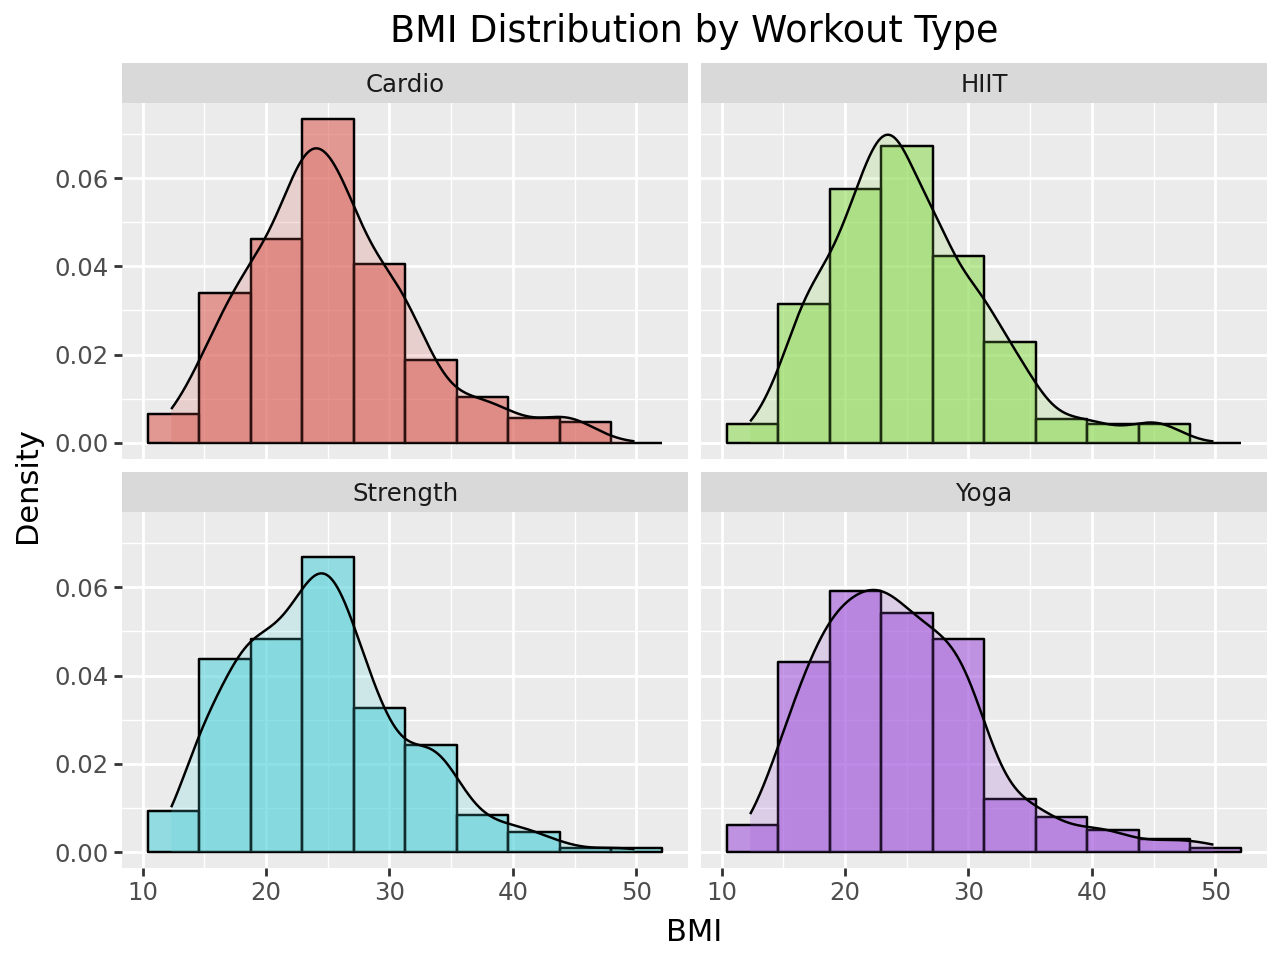

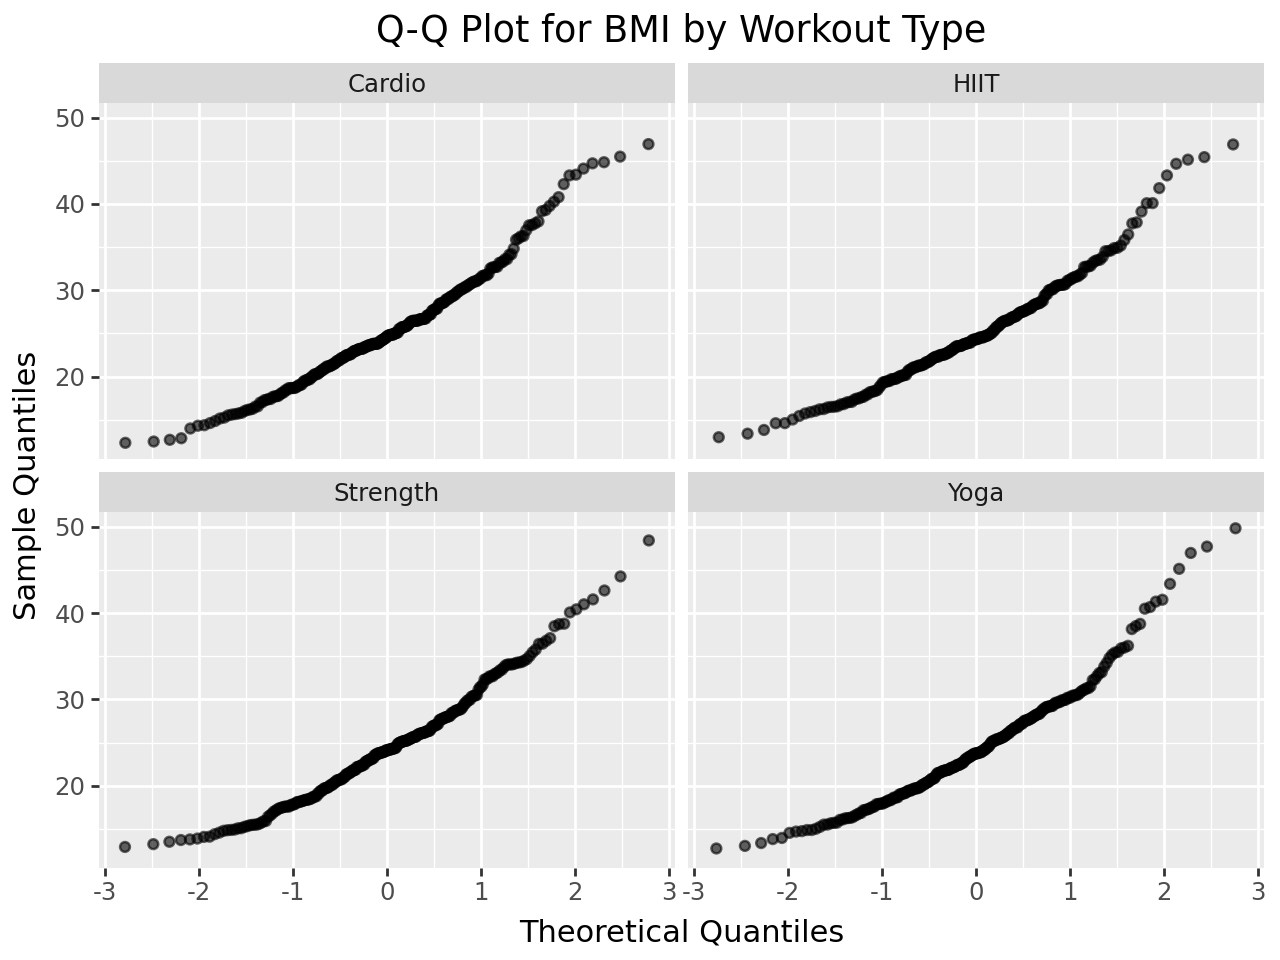

2. **ANOVA Test**: The ANOVA test results were not statistically significant (p-value > 0.05), meaning we failed to reject the null hypothesis. This outcome confirms that there is no significant difference in BMI between workout types.

### Conclusion

Based on the ANOVA test and visual analysis, we conclude that **BMI does not significantly influence the choice of workout type**. Gym members with varying BMI levels seem to participate in Cardio, HIIT, Strength, and Yoga workouts without a clear preference for a particular type based on BMI alone. This suggests that factors other than BMI, such as personal fitness goals, experience level, or workout preferences, may play a more substantial role in determining workout type.